## A4 - Build a hidden layer Neural Network

You are now going to build a full Neural Network with one hidden layer. This will allow to model to learn more complex decision boundaries and not just linear ones. This will result in an improved model compared to that you obtained in task A3. 

In practice you are going to repeat all the steps of task A3 but this time with an extra layer to the network. Set the hidden layer to have 4 neurons (in the code this dimension is denoted `n_h`). You may find it helpful to refer to the project lecture when you are completing this section.

The forward propagation has the form `linear`->`tanh`->`linear`->`sigmoid`. So this will take the form below where $W$ and $T$ are appropriately sized matrices containing weights and $b$ and $c$ are appropriately sized column vectors for the biases (some of the dimensions of these objects will now depend on `n_h`). The input matrix $X$ is the same as in task A3, $z$, $a$, $v$ give intermediate output with $\hat y$ the final output.

$$
z = W\cdot X + b \\
a = \tanh(z) \\
v = T \cdot a + c \\
\hat y = \sigma(v)
$$

The code for the new backward propogation function, in this notation, is as follows and you can cut and paste this into your code as appropriate.

`dv = y_hat - y
dT = np.dot(dv, a.T)/m
dc = np.sum(dv, axis=1, keepdims=True)/m
dz = np.dot(T.T, dv) * (1 - np.power(a, 2))
dW = np.dot(dz, X.T)/m
db = np.sum(dz, axis=1, keepdims=True)/m`

#### Neural Network Model

Below gives a basic structure for your final model, you need to build all the helper functions from scratch this time.

**Specifically, using an approach similar to that seen in A3, you should**

- Complete the function below `model_nn`, including all the necessary helper functions.
- Include a function `predict` which takes in the dictionary of paremeters and input data 'X' and returns predictions of the labels for each example.
- Produce a visualisation of the regions of the plane predicted to be red/blue by your model and the original data.
- Calculate and print the accuracy of the model (the percentage of points for which the model predicts the correct label).
- Make some comments, in a markdown cell, which compare the model developed in A3 to the model developed in A4.

**You may use code from Task A3 here but be careful to rename functions and variables as appropriate to avoid clashes with any values established for this notebook in Task A3.**

*Edit the code cell below and insert further code and markdown cells in which to answer this task*

#### Creating the dataset

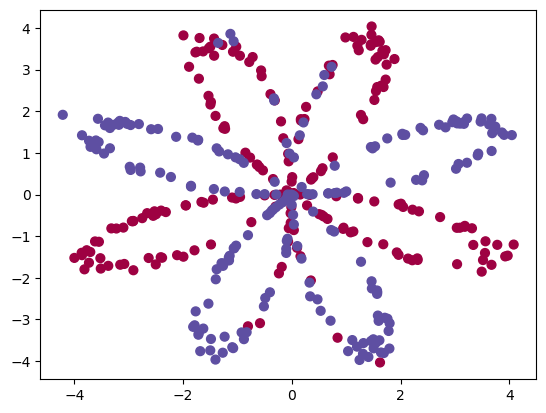

In [1]:
# Create the flower dataset

import numpy as np
import matplotlib.pyplot as plt
import copy

def load_flower_dataset():
    np.random.seed(1)

    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality

    X = np.zeros((m,D)) # data matrix where each row is a single example
    y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    X = X.T
    y = y.T

    return X, y

# Load the dataset:
X, y = load_flower_dataset()

# Visualize the dataset:
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral);

#### Initialize parameters

Here we write a function to initialise the parameters:
- $W = \left (\begin{matrix}W_{00}&W_{01}\\W_{10}&W_{11}\\W_{20}&W_{21}\\W_{30}&W_{31}\end{matrix}\right )$
- $b = \left (\begin{matrix}b_0\\b_1\\b_2\\b_3\end{matrix}\right )$
- $T = \left (\begin{matrix}t_0&t_1&t_2&t_3\end{matrix}\right )$
- $c$

Where the entries for the bias vectors are 0, and the weight entries are randomized.
These parameters are returned in a dictionary

In [2]:
def initialize_parameters(n_X, n_y, n_h):
    """
    Argument:
    n_X -- integer
    n_y -- integer
    n_h -- integer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W -- weight matrix
                    b -- bias vector
                    t -- weight matrix
                    c -- bias vector
    """

    #Initialize weight matrix nd bias vector
    W = np.random.randn(n_h,n_X)*0.01
    b = np.zeros((n_h,1))
    T = np.random.randn(1,n_h)
    c = np.zeros((1,n_y))

    #Store W,b,t and c in a dictionary parameters
    parameters = {"W": W,
                  "b": b,
                  "T": T,
                  "c": c}

    return parameters

#### tanh activation function

A function that takes in an input of a vector and returns a vector where tanh has been performed on each entry

In [3]:
def tanh(z):
    """
    Argument:
    z -- input data, numpy array

    Returns:
    numpy array that contains tanh function applied to each
    element of z.
    """
    return np.tanh(z)

#### Sigmoid activation function

A function that takes in an input of a vector and returns a vector where the sigmoid activation function has been performed on each entry

In [4]:
def sigmoid(z):
    """
    Argument:
    z -- input data, numpy array

    Returns:
    numpy array that contains sigmoid function applied to each
    element of z.
    """
    return 1/(1+np.exp(-z))

#### Forward Propagation

Here we write a function that takes in the input data and the weights and biases data, and performs the forward propagation of: 

$$
z = W\cdot X + b \\
a = \tanh(z) \\
v = T \cdot a + c \\
\hat y = \sigma(v)
$$

and then returns the values $\hat y, a$ and $v$

In [5]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data, numpy array of dimension (2, 400). Every column of X
         is the feature vector for a single training example (input of the logistic regression)
    parameters -- python dictionary containing the values of W, b, t and c to be used
                  to compute the forward propagation.

    Returns:
    y_hat -- numpy array of dimension (1,400). Every column of y_hat is the
             output probability of the logistic regression for that training example.
    a -- numpy array of dimension (4,400), result of linear transformation after tanh activation function is applied.
    v -- numpy array of dimension (1,400), result of linear transformation before sigmoid activation is applied.
    """

    # retrieve W, b, t and c from the dictionary "parameters"
    W,b,T,c = parameters['W'],parameters['b'],parameters['T'],parameters['c']

    # compute z
    z = np.matmul(W,X) + b
    
    #compute a
    a = tanh(z)
    
    #compute v
    v = np.matmul(T,a) + c

    # Compute y_hat
    y_hat = sigmoid(v)

    return y_hat, a, v

#### Cost function

Here we simply repeat the cost function from A3, as the data is of suitable format to simply be parsed through it without issue

In [6]:
def compute_cost(y_hat, y):
    """
    Arguments:
    y_hat -- numpy array, output of forward propagation
    y -- numpy array of the same shape as y_hat, containing the true labels (0 for red, 1 for blue)

    Returns:
    cost -- a float which is the cross-entropy cost
    """

    # retrieve number of training examples from the shape of y
    m = y.shape[1]

    # compute the vector of losses by computing the cross-entropy loss element-wise
    def L(a,b):
        return -(b*np.log(a)+(1-b)*np.log(1-a))

    # compute the total cost by averaging the loss over all training examples
    J = 0
    for i in range(1,m):
        J += L(y_hat[0,i],y[0,i])
    J /= m

    # cast cost as a float
    cost = float(J)

    return cost

#### Backwards Propagation

We here define a function for the backwards propagation of the neural network, taking in the input data, the result of the forward propagation, and the labels vector itself, before returning the gradient vectors for each of the weights and bias vectors.

In [7]:
def backward_propagation(parameters, a, y_hat, X, y):
    """
    Implement the backward propagation.

    Arguments:
    parameters -- python dictionary containing W, b, t and c to use
    y_hat - from output of forward prop
    X -- input data
    y -- labels vector

    Returns:
    grads -- python dictionary containing the gradients
    """
    # Retrieve the number of training examples from the shape of y
    m = y.shape[1]

    # retrieve W from the dictionary "parameters".
    W = parameters['W']
    T = parameters['T']

    # Backward propagation: calculate dW, db, dt, and dc.
    dv = y_hat - y 
    dT = np.dot(dv, a.T)/m 
    dc = np.sum(dv, axis=1, keepdims=True)/m 
    dz = np.dot(T.T, dv) * (1 - np.power(a, 2)) 
    dW = np.dot(dz, X.T)/m 
    db = np.sum(dz, axis=1, keepdims=True)/m

    grads = {"dW": dW,
             "db": db,
             "dT": dT,
             "dc": dc}

    return grads

#### Updating parameters

We here update the parameters based upon the gradients calculated by the backward propagation by doing:
$$
W \rightarrow W - dW \times \text{learning rate}\\
b \rightarrow b - db \times \text{learning rate}\\
T \rightarrow T - dT \times \text{learning rate}\\
c \rightarrow c - dc \times \text{learning rate}
$$

Before returning these parameters in a dictionary

In [8]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Arguments:
    parameters -- python dictionary containing the parameters
    grads -- python dictionary containing the gradients

    Returns:
    parameters -- python dictionary containing the updated parameters
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W
    
    W = copy.deepcopy(parameters["W"])
    b = copy.deepcopy(parameters['b'])
    T = copy.deepcopy(parameters["T"])
    c = copy.deepcopy(parameters['c'])

    # Retrieve each gradient from the dictionary "grads"
    dW,db,dT,dc = grads['dW'],grads['db'],grads['dT'],grads['dc']

    # Update each parameter
    W -= dW*learning_rate
    b -= db*learning_rate
    T -= dT*learning_rate
    c -= dc*learning_rate

    # Store the new parameters in the dictionary parameters
    parameters = {"W": W,
                  "b": b,
                  "T": T,
                  "c": c}

    return parameters

#### Modelling the neural network

Here we piece together all of the helper functions into a function to complete the actual learning process based on the data sets $X\text{ and }y$, as well as the number of nodes in the hidden layer, and the number of training iterations

In [9]:
def model_nn(X, y, n_h = 4, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- numpy array, input data
    y -- numpy array, true labels
    n_h -- integer, number of neurons in the hidden layer
    num_iterations -- number of iterations in the gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- optimized parameters learnt by the model.
    """
    # Optional: to control the random seed of the initialization uncomment next line
    np.random.seed(3)

    # retrieve n_x and n_y
    n_X = X.shape[0]
    n_y = y.shape[0]

    # Initialize parameters
    parameters = initialize_parameters(n_X,n_y,n_h)

    # Training loop
    for i in range(0, num_iterations):

        # Forward propagation
        y_hat, a, v = forward_propagation(X, parameters)

        # Compute cost
        cost = compute_cost(y_hat, y)

        # Backpropagation
        grads = backward_propagation(parameters, a, y_hat, X, y)

        # Update parameters
        parameters = update_parameters(parameters, grads)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    learned_parameters = parameters

    return learned_parameters

#### Prediction function

We then use the forward propagation function to predict the outputs of $y$ as $\hat y$ and then parse this into a detection check to determine the predicted colour of a point in the dataset

In [10]:
def predict(learned_parameters, X):
    """
    Arguments:
    parameters -- python dictionary containing the learned parameters given by model
    X -- numpy array input data

    Returns
    predictions -- vector of predictions for each column of X (red: 0 / blue: 1)
    """

    # Compute predicted probabilities using the learned parameters
    
    y_hat, a, z = forward_propagation(X, learned_parameters)

    # Classify as 0 or 1 using 0.5 as a threshold
    
    predictions = (y_hat > 0.5)

    return predictions

#### Plotting boundaries

Following the predctions, we draw bounding lines on the output space to show the different regions of the graph and what colour the poits would be predicted to be 

In [11]:
# Function to plot decision boundary

def plot_decision_boundary(learned_parameters, X, y):

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = predict(learned_parameters,np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, 10, alpha=0.5, cmap=plt.cm.Spectral)
    plt.contour(xx, yy, Z, 10, alpha=0.5, colors = "black")
    plt.ylabel('x1')
    plt.xlabel('x0')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()

#### Training the model

Using the modeling function, we then train the function and draw the boundaries based on the trained data

Cost after iteration 0: 0.692907
Cost after iteration 1000: 0.280552
Cost after iteration 2000: 0.268355
Cost after iteration 3000: 0.261462
Cost after iteration 4000: 0.256949
Cost after iteration 5000: 0.253824
Cost after iteration 6000: 0.251560
Cost after iteration 7000: 0.249857
Cost after iteration 8000: 0.248536
Cost after iteration 9000: 0.247484


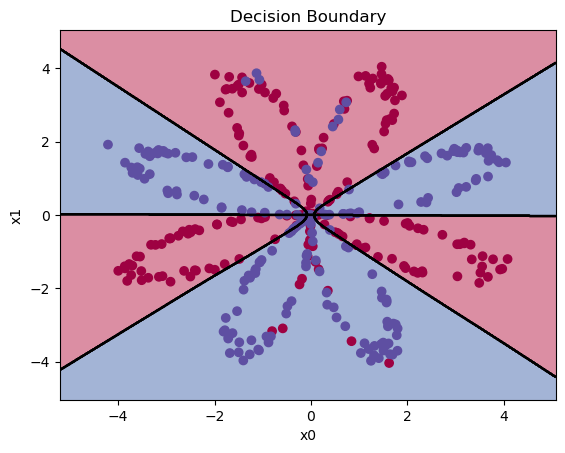

In [12]:
# Train your model
learned_parameters = model_nn(X, y, 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(learned_parameters, X, y)


#### Accuracy check

Finally, we take the predictions and compare them to the actual truth values of the points, returning the overall accuracy of the trained model.

In [13]:
# Print accuracy

predictions = predict(learned_parameters, X)

accuracy = 100*(predictions == y).sum()/len(y[0])
    
print ('Accuracy of logistic regression: %d ' % accuracy +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 91 % (percentage of correctly labelled datapoints)
